# Test ios Model vs. py

In [ ]:
from notebooks import *
sg.init(None)
figsize(aspect=1/12)
def sigp(x):
    pp((x.shape, x[:7]))
def sig(x):
    sigp(x)
    plt.plot(x); plt.show()
def mat(X, rows=10, cols=10, **show_img_kwargs):
    pp(X.shape)
    pp(X[:rows, :cols])
    show_img(X, **show_img_kwargs)

INFO     [17:37:09.408] [10962] 151 logging_/<module>: {logging_yaml: None}

INFO     [17:37:09.878] [10962]  32 api.server_globals/init

DEBUG    [17:37:09.886] [10962]  75 api.server_globals/load: load_search...

INFO     [17:37:10.537] [10962]  79 api.server_globals/load: load_search (took 0.645s)

DEBUG    [17:37:10.545] [10962]  75 api.server_globals/load: load_xc_meta...

INFO     [17:37:11.005] [10962]  79 api.server_globals/load: load_xc_meta (took 0.453s)

DEBUG    [17:37:11.013] [10962]  75 api.server_globals/load: load_feat_info...

INFO     [17:37:11.020] [10962] 110 api.server_globals/load_feat_info

INFO     [17:37:11.026] [10962]  79 api.server_globals/load: load_feat_info (took 0.007s)

DEBUG    [17:37:11.033] [10962]  75 api.server_globals/load: load_search_recs...

INFO     [17:37:11.041] [10962] 118 api.server_globals/load_search_recs

INFO     [17:37:11.047] [10962] 601 api.recs/get_search_recs

INFO     [17:37:11.065] [10962] 151 payloads/df_cache_hybrid: Hit: payloads/search_recs-version[8],limit[3500],audio_s[10],countries_k[na],com_names_k[ca],num_recs[None]-064a482

DEBUG    [17:37:11.076] [10962] 152 payloads/df_cache_hybrid: Hit ...

DEBUG    [17:37:11.086] [10962] 161 payloads/df_cache_hybrid: Hit: Read api/lite.parquet (5.1 MB) ...

INFO     [17:37:12.493] [10962] 168 payloads/df_cache_hybrid: Hit: Read api/lite.parquet (5.1 MB) [1.407s]

DEBUG    [17:37:12.511] [10962] 173 payloads/df_cache_hybrid: Hit: Read api/bytes-audio_bytes.parquet (142.0 MB) ...

INFO     [17:37:12.846] [10962] 180 payloads/df_cache_hybrid: Hit: Read api/bytes-audio_bytes.parquet (142.0 MB) [0.335s]

DEBUG    [17:37:12.860] [10962] 173 payloads/df_cache_hybrid: Hit: Read api/bytes-spectro_bytes.parquet (38.5 MB) ...

INFO     [17:37:12.947] [10962] 180 payloads/df_cache_hybrid: Hit: Read api/bytes-spectro_bytes.parquet (38.5 MB) [0.087s]

DEBUG    [17:37:12.960] [10962] 185 payloads/df_cache_hybrid: Hit: Read api/feat-f_preds.npy (4.6 MB) ...

INFO     [17:37:12.972] [10962] 187 payloads/df_cache_hybrid: Hit: Read api/feat-f_preds.npy (4.6 MB) [float32, 0.012s]

DEBUG    [17:37:12.983] [10962] 185 payloads/df_cache_hybrid: Hit: Read api/feat-feat.npy (21.0 MB) ...

INFO     [17:37:13.003] [10962] 187 payloads/df_cache_hybrid: Hit: Read api/feat-feat.npy (21.0 MB) [float32, 0.021s]

INFO     [17:37:13.011] [10962] 190 payloads/df_cache_hybrid: Hit: Join lite + bytes + feats

INFO     [17:37:13.057] [10962] 201 payloads/df_cache_hybrid: Hit [1.981s]

,dir,file,size,frac
5,api,TOTAL,211258662,1.000
1,api,api/bytes-audio_bytes.parquet,142018687,0.672
2,api,api/bytes-spectro_bytes.parquet,38468688,0.182
4,api,api/feat-feat.npy: float32,21000128,0.099
0,api,api/lite.parquet,5137031,0.024
3,api,api/feat-f_preds.npy: float32,4634128,0.022


INFO     [17:37:13.096] [10962]  79 api.server_globals/load: load_search_recs (took 2.055s)

INFO     [17:37:13.103] [10962]  34 api.server_globals/init: done

In [ ]:
# Params (global)
sample_rate = sg.search.projection.features.sample_rate
f_bins      = sg.search.projection.features.f_bins

# SpectroLike

(

4

,

5

)

array([[0.309, 0.255, 0.42 , 0.662, 0.5  ],
       [0.95 , 0.275, 0.237, 0.297, 0.482],
       [0.822, 0.154, 0.774, 0.141, 0.083],
       [0.609, 0.356, 0.931, 0.131, 0.659]])

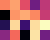

(

4

,

5

)

array([[0.588, 0.486, 0.799, 1.261, 0.952],
       [1.807, 0.523, 0.451, 0.564, 0.917],
       [1.565, 0.292, 1.474, 0.269, 0.157],
       [1.16 , 0.678, 1.772, 0.249, 1.255]])

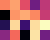

In [ ]:
with test_for_swift('SpectroLike.norm_rms') as (name, Dump):
    spectro = SpectroLike()  # Mock
    spectro.S = np.random.rand(4,5); spectro.S
    X = spectro.S
    Y = spectro.norm_rms().S
    mat(X, scale=10)
    mat(Y, scale=10)
    raise Dump(X=X.tolist(), Y=Y.tolist())

(

4

,

5

)

array([[0.121, 0.379, 0.121, 0.962, 0.586],
       [0.168, 0.217, 0.727, 0.738, 0.06 ],
       [0.336, 0.986, 0.112, 0.678, 0.39 ],
       [0.175, 0.279, 0.439, 0.531, 0.938]])

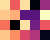

(

4

,

5

)

array([[0.   , 0.   , 0.   , 0.584, 0.208],
       [0.   , 0.   , 0.51 , 0.521, 0.   ],
       [0.   , 0.595, 0.   , 0.288, 0.   ],
       [0.   , 0.   , 0.   , 0.091, 0.498]])

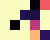

In [ ]:
with test_for_swift('SpectroLike.clip_below_median_per_freq') as (name, Dump):
    spectro = SpectroLike()  # Mock
    spectro.S = np.random.rand(4,5); spectro.S
    X = spectro.S
    Y = spectro.clip_below_median_per_freq().S
    mat(X, scale=10)
    mat(Y, scale=10)
    raise Dump(X=X.tolist(), Y=Y.tolist())

# Features._spectro_denoise

(

4

,

5

)

array([[0.411, 0.934, 0.878, 0.425, 0.476],
       [0.875, 0.84 , 0.987, 0.502, 0.311],
       [0.237, 0.544, 0.671, 0.647, 0.194],
       [0.165, 0.408, 0.824, 0.121, 0.774]])

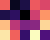

(

4

,

5

)

array([[0.   , 0.735, 0.647, 0.   , 0.   ],
       [0.056, 0.   , 0.237, 0.   , 0.   ],
       [0.   , 0.   , 0.204, 0.166, 0.   ],
       [0.   , 0.   , 0.668, 0.   , 0.588]])

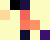

In [ ]:
with test_for_swift('Features._spectro_denoise') as (name, Dump):
    spectro = SpectroLike()  # Mock
    spectro.S = np.random.rand(4,5); spectro.S
    X = spectro.S
    Y = Features._spectro_denoise(None, spectro).S
    mat(X, scale=10)
    mat(Y, scale=10)
    raise Dump(X=X.tolist(), Y=Y.tolist())

# Features.spectro

 685 scipy.signal.spectral/spectrogram: args , x_shape=(1436,), x=array([0, 0, 0, 0, 0], dtype=int16), fs=22050, window='hann', nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='magnitude'

1481 scipy.signal.spectral/_spectral_helper: args , x_shape=(1436,), x=array([0, 0, 0, 0, 0], dtype=int16), fs=22050, nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='stft'

1710 scipy.signal.spectral/_fft_helper: args  , x_shape=(1436,), x=array([0, 0, 0, 0, 0], dtype=int16), nperseg=512, noverlap=256, nfft=512, sides='onesided'

1721 scipy.signal.spectral/_fft_helper: strid, result_shape=(4, 512), result=array([0, 0, 0, 0, 0], dtype=int16), step=256, strides=(512, 2), shape=(4, 512)

1725 scipy.signal.spectral/_fft_helper: detre, result_shape=(4, 512), result=array([-292.346, -292.346, -292.346, -292.346, -292.346])

1729 scipy.signal.spectral/_fft_helper: windo, result_shape=(4, 512), result=array([-0.   +0.j, -0.011+0.j, -0.044+0.j, -0.099+0.j, -0.176+0.j]), win=array([0.000e+00+0.j, 3.765e-05+0.j, 1.506e-04+0.j, 3.388e-04+0.j, 6.023e-04+0.j], dtype=complex64)

1738 scipy.signal.spectral/_fft_helper: fft  , result_shape=(4, 257), result=array([-6433.698    +0.j   ,  5770.769+26543.855j, -2126.358 -6636.636j,  -285.852 -1390.241j,   -72.516  -533.915j]), func=<function rfft at 0x1144810d0>

1657 scipy.signal.spectral/_spectral_helper: scale, result_shape=(4, 257), result=array([-25.132  +0.j   ,  22.542+103.687j,  -8.306 -25.924j,  -1.117  -5.431j,  -0.283  -2.086j])

 713 scipy.signal.spectral/spectrogram: mode , Sxx_shape=(257, 4), Sxx=array([ 25.132, 106.109,  27.222,   5.544,   2.105], dtype=float32)

(

(

1436

,

)

,

array([0, 0, 0, 0, 0, 0, 0], dtype=int16)

)

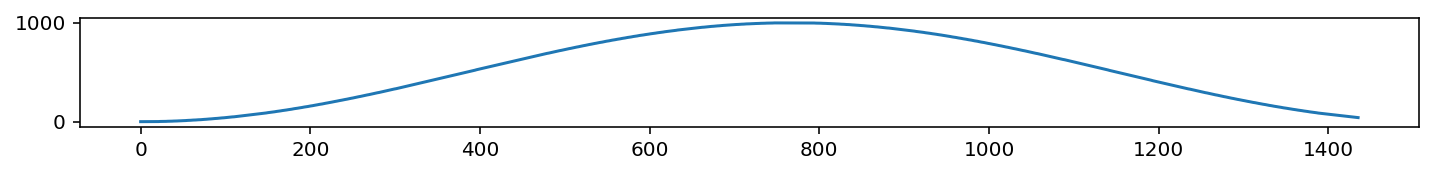

(

40

,

4

)

array([[ 67.321,  67.325,  60.453,  67.33 ],
       [ 47.391,  47.387,  42.113,  47.402],
       [ 31.045,  30.979,  18.978,  31.   ],
       [ 22.043,  22.197,   7.911,  22.204],
       [ 16.148,  15.816,   2.278,  15.853],
       [ 11.5  ,  11.586,   1.445,  11.693],
       [  8.736,   8.305,  -3.198,   8.151],
       [  4.184,   5.203,  -4.682,   5.177],
       [  5.441,   4.837, -12.67 ,   5.236],
       [  5.029,   2.725,  -3.984,   2.404]])

In [ ]:
with test_for_swift('Features.spectro: generate audio from hann window (denoise=false)') as (name, Dump):
    denoise = False
    audio = (scipy.signal.hann(512*3)[:-100] * 1000).astype(np.int16)
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat(S, scale=3)  # (Upside down; use spectro.plot(raw=dict(scale=...)) for right side up)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, S=S.tolist())

 685 scipy.signal.spectral/spectrogram: args , x_shape=(1436,), x=array([0, 0, 0, 0, 0], dtype=int16), fs=22050, window='hann', nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='magnitude'

1481 scipy.signal.spectral/_spectral_helper: args , x_shape=(1436,), x=array([0, 0, 0, 0, 0], dtype=int16), fs=22050, nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='stft'

1710 scipy.signal.spectral/_fft_helper: args  , x_shape=(1436,), x=array([0, 0, 0, 0, 0], dtype=int16), nperseg=512, noverlap=256, nfft=512, sides='onesided'

1721 scipy.signal.spectral/_fft_helper: strid, result_shape=(4, 512), result=array([0, 0, 0, 0, 0], dtype=int16), step=256, strides=(512, 2), shape=(4, 512)

1725 scipy.signal.spectral/_fft_helper: detre, result_shape=(4, 512), result=array([-292.346, -292.346, -292.346, -292.346, -292.346])

1729 scipy.signal.spectral/_fft_helper: windo, result_shape=(4, 512), result=array([-0.   +0.j, -0.011+0.j, -0.044+0.j, -0.099+0.j, -0.176+0.j]), win=array([0.000e+00+0.j, 3.765e-05+0.j, 1.506e-04+0.j, 3.388e-04+0.j, 6.023e-04+0.j], dtype=complex64)

1738 scipy.signal.spectral/_fft_helper: fft  , result_shape=(4, 257), result=array([-6433.698    +0.j   ,  5770.769+26543.855j, -2126.358 -6636.636j,  -285.852 -1390.241j,   -72.516  -533.915j]), func=<function rfft at 0x1144810d0>

1657 scipy.signal.spectral/_spectral_helper: scale, result_shape=(4, 257), result=array([-25.132  +0.j   ,  22.542+103.687j,  -8.306 -25.924j,  -1.117  -5.431j,  -0.283  -2.086j])

 713 scipy.signal.spectral/spectrogram: mode , Sxx_shape=(257, 4), Sxx=array([ 25.132, 106.109,  27.222,   5.544,   2.105], dtype=float32)

(

(

1436

,

)

,

array([0, 0, 0, 0, 0, 0, 0], dtype=int16)

)

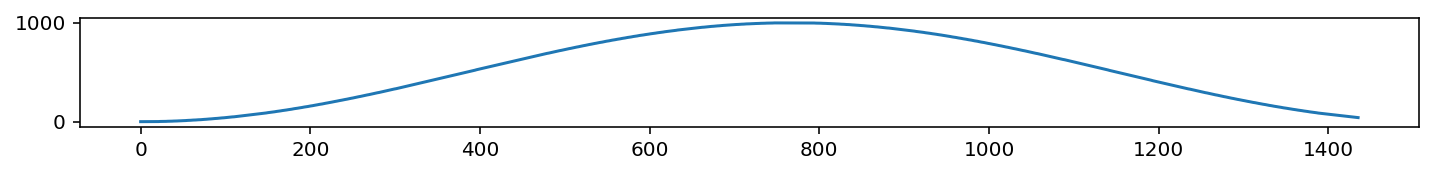

(

40

,

4

)

array([[0.000e+00, 1.213e-04, 0.000e+00, 4.387e-04],
       [1.197e-04, 0.000e+00, 0.000e+00, 8.563e-04],
       [3.705e-03, 0.000e+00, 0.000e+00, 6.857e-04],
       [0.000e+00, 5.206e-03, 0.000e+00, 5.620e-03],
       [2.110e-02, 0.000e+00, 0.000e+00, 1.222e-03],
       [0.000e+00, 2.890e-03, 0.000e+00, 1.010e-02],
       [3.416e-02, 5.195e-03, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.515e-02, 0.000e+00, 3.340e-02],
       [2.720e-02, 0.000e+00, 0.000e+00, 1.341e-02],
       [1.658e-01, 1.081e-02, 0.000e+00, 0.000e+00]])

In [ ]:
with test_for_swift('Features.spectro: generate audio from hann window (denoise=true)') as (name, Dump):
    denoise = True
    audio = (scipy.signal.hann(512*3)[:-100] * 1000).astype(np.int16)
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat(S, scale=3)  # (Upside down; use spectro.plot(raw=dict(scale=...)) for right side up)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, S=S.tolist())  # To copy to .swift notebook

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

 685 scipy.signal.spectral/spectrogram: args , x_shape=(4410,), x=array([709, 698, 688, 672, 666], dtype=int16), fs=22050, window='hann', nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='magnitude'

1481 scipy.signal.spectral/_spectral_helper: args , x_shape=(4410,), x=array([709, 698, 688, 672, 666], dtype=int16), fs=22050, nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='stft'

1710 scipy.signal.spectral/_fft_helper: args  , x_shape=(4410,), x=array([709, 698, 688, 672, 666], dtype=int16), nperseg=512, noverlap=256, nfft=512, sides='onesided'

1721 scipy.signal.spectral/_fft_helper: strid, result_shape=(16, 512), result=array([709, 698, 688, 672, 666], dtype=int16), step=256, strides=(512, 2), shape=(16, 512)

1725 scipy.signal.spectral/_fft_helper: detre, result_shape=(16, 512), result=array([645.471, 634.471, 624.471, 608.471, 602.471])

1729 scipy.signal.spectral/_fft_helper: windo, result_shape=(16, 512), result=array([0.   +0.j, 0.024+0.j, 0.094+0.j, 0.206+0.j, 0.363+0.j]), win=array([0.000e+00+0.j, 3.765e-05+0.j, 1.506e-04+0.j, 3.388e-04+0.j, 6.023e-04+0.j], dtype=complex64)

1738 scipy.signal.spectral/_fft_helper: fft  , result_shape=(16, 257), result=array([ 2831.633    +0.j   , -5358.715-40296.253j,  4052.413+12193.229j,  1025.804  +276.813j,  -709.316 +1070.115j]), func=<function rfft at 0x1144810d0>

1657 scipy.signal.spectral/_spectral_helper: scale, result_shape=(16, 257), result=array([ 11.061  +0.j   , -20.932-157.407j,  15.83  +47.63j ,   4.007  +1.081j,  -2.771  +4.18j ])

 713 scipy.signal.spectral/spectrogram: mode , Sxx_shape=(257, 16), Sxx=array([ 11.061, 158.793,  50.191,   4.15 ,   5.015], dtype=float32)

(

(

4410

,

)

,

array([709, 698, 688, 672, 666, 667, 652], dtype=int16)

)

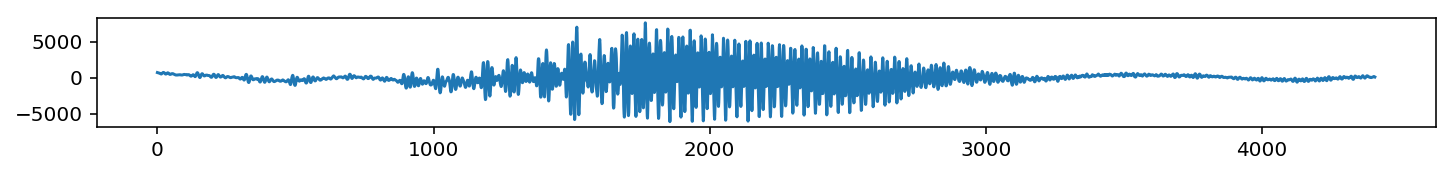

(

40

,

16

)

array([[71.045, 70.62 , 72.197, 69.471, 68.385, 64.961, 65.43 , 67.948, 66.917, 72.074],
       [51.794, 55.888, 56.272, 56.295, 54.981, 48.476, 51.815, 55.156, 48.619, 54.754],
       [45.456, 46.784, 51.51 , 48.589, 50.038, 48.155, 47.05 , 49.967, 43.269, 39.701],
       [50.546, 52.031, 56.024, 50.608, 51.053, 50.564, 48.166, 48.088, 45.882, 44.746],
       [52.658, 51.607, 49.169, 54.316, 50.561, 54.905, 52.817, 51.568, 55.023, 62.049],
       [50.123, 46.496, 56.446, 65.931, 61.677, 71.55 , 74.689, 73.477, 73.492, 74.671],
       [52.812, 51.329, 56.542, 67.225, 69.543, 76.571, 77.683, 76.919, 75.483, 73.299],
       [55.468, 54.347, 58.197, 66.099, 68.879, 69.861, 62.807, 61.708, 57.602, 51.329],
       [56.19 , 58.538, 60.05 , 70.976, 72.937, 72.872, 58.634, 58.18 , 52.719, 43.861],
       [52.693, 56.322, 54.892, 62.473, 74.348, 77.333, 58.92 , 62.826, 54.573, 42.132]])

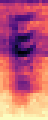

In [ ]:
with test_for_swift('Features.spectro: XC415272 start=2.05 end=2.25 (denoise=false)') as (name, Dump):
    denoise = False
    (xc_id, start_s, end_s) = (415272, 2.05, 2.25)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat(S, scale=3)  # (Upside down; use spectro.plot(raw=dict(scale=...)) for right side up)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, audio=audio.tolist(), S=S.tolist())

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

 685 scipy.signal.spectral/spectrogram: args , x_shape=(4410,), x=array([709, 698, 688, 672, 666], dtype=int16), fs=22050, window='hann', nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='magnitude'

1481 scipy.signal.spectral/_spectral_helper: args , x_shape=(4410,), x=array([709, 698, 688, 672, 666], dtype=int16), fs=22050, nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='stft'

1710 scipy.signal.spectral/_fft_helper: args  , x_shape=(4410,), x=array([709, 698, 688, 672, 666], dtype=int16), nperseg=512, noverlap=256, nfft=512, sides='onesided'

1721 scipy.signal.spectral/_fft_helper: strid, result_shape=(16, 512), result=array([709, 698, 688, 672, 666], dtype=int16), step=256, strides=(512, 2), shape=(16, 512)

1725 scipy.signal.spectral/_fft_helper: detre, result_shape=(16, 512), result=array([645.471, 634.471, 624.471, 608.471, 602.471])

1729 scipy.signal.spectral/_fft_helper: windo, result_shape=(16, 512), result=array([0.   +0.j, 0.024+0.j, 0.094+0.j, 0.206+0.j, 0.363+0.j]), win=array([0.000e+00+0.j, 3.765e-05+0.j, 1.506e-04+0.j, 3.388e-04+0.j, 6.023e-04+0.j], dtype=complex64)

1738 scipy.signal.spectral/_fft_helper: fft  , result_shape=(16, 257), result=array([ 2831.633    +0.j   , -5358.715-40296.253j,  4052.413+12193.229j,  1025.804  +276.813j,  -709.316 +1070.115j]), func=<function rfft at 0x1144810d0>

1657 scipy.signal.spectral/_spectral_helper: scale, result_shape=(16, 257), result=array([ 11.061  +0.j   , -20.932-157.407j,  15.83  +47.63j ,   4.007  +1.081j,  -2.771  +4.18j ])

 713 scipy.signal.spectral/spectrogram: mode , Sxx_shape=(257, 16), Sxx=array([ 11.061, 158.793,  50.191,   4.15 ,   5.015], dtype=float32)

(

(

4410

,

)

,

array([709, 698, 688, 672, 666, 667, 652], dtype=int16)

)

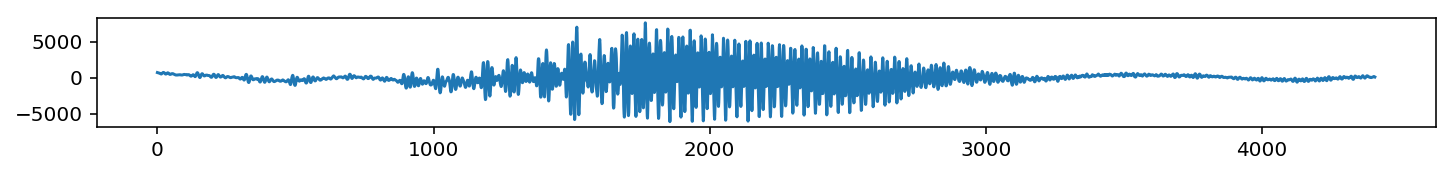

(

40

,

16

)

array([[0.045, 0.037, 0.068, 0.014, 0.   , 0.   , 0.   , 0.   , 0.   , 0.065],
       [0.   , 0.076, 0.084, 0.084, 0.059, 0.   , 0.   , 0.062, 0.   , 0.054],
       [0.   , 0.013, 0.105, 0.048, 0.076, 0.04 , 0.018, 0.075, 0.   , 0.   ],
       [0.043, 0.072, 0.15 , 0.044, 0.053, 0.044, 0.   , 0.   , 0.   , 0.   ],
       [0.01 , 0.   , 0.   , 0.043, 0.   , 0.054, 0.013, 0.   , 0.056, 0.193],
       [0.   , 0.   , 0.   , 0.087, 0.004, 0.196, 0.258, 0.234, 0.234, 0.257],
       [0.   , 0.   , 0.   , 0.127, 0.172, 0.309, 0.33 , 0.316, 0.288, 0.245],
       [0.011, 0.   , 0.064, 0.218, 0.272, 0.291, 0.154, 0.132, 0.052, 0.   ],
       [0.034, 0.08 , 0.109, 0.322, 0.36 , 0.359, 0.081, 0.073, 0.   , 0.   ],
       [0.   , 0.052, 0.025, 0.172, 0.404, 0.462, 0.103, 0.179, 0.018, 0.   ]])

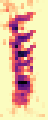

In [ ]:
with test_for_swift('Features.spectro: XC415272 start=2.05 end=2.25 (denoise=true)') as (name, Dump):
    denoise = True
    (xc_id, start_s, end_s) = (415272, 2.05, 2.25)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat(S, scale=3)  # (Upside down; use spectro.plot(raw=dict(scale=...)) for right side up)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, audio=audio.tolist(), S=S.tolist())

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

 685 scipy.signal.spectral/spectrogram: args , x_shape=(220500,), x=array([0, 0, 0, 0, 0], dtype=int16), fs=22050, window='hann', nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='magnitude'

1481 scipy.signal.spectral/_spectral_helper: args , x_shape=(220500,), x=array([0, 0, 0, 0, 0], dtype=int16), fs=22050, nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='stft'

1710 scipy.signal.spectral/_fft_helper: args  , x_shape=(220500,), x=array([0, 0, 0, 0, 0], dtype=int16), nperseg=512, noverlap=256, nfft=512, sides='onesided'

1721 scipy.signal.spectral/_fft_helper: strid, result_shape=(860, 512), result=array([0, 0, 0, 0, 0], dtype=int16), step=256, strides=(512, 2), shape=(860, 512)

1725 scipy.signal.spectral/_fft_helper: detre, result_shape=(860, 512), result=array([-0.012, -0.012, -0.012, -0.012, -0.012])

1729 scipy.signal.spectral/_fft_helper: windo, result_shape=(860, 512), result=array([-0.000e+00+0.j, -4.412e-07+0.j, -1.765e-06+0.j, -3.970e-06+0.j, -7.058e-06+0.j]), win=array([0.000e+00+0.j, 3.765e-05+0.j, 1.506e-04+0.j, 3.388e-04+0.j, 6.023e-04+0.j], dtype=complex64)

1738 scipy.signal.spectral/_fft_helper: fft  , result_shape=(860, 257), result=array([-1.254+0.j   ,  1.17 +0.126j,  0.952+1.997j, -2.31 -0.984j,  0.892+1.05j ]), func=<function rfft at 0x1144810d0>

1657 scipy.signal.spectral/_spectral_helper: scale, result_shape=(860, 257), result=array([-0.005+0.j   ,  0.005+0.j   ,  0.004+0.008j, -0.009-0.004j,  0.003+0.004j])

 713 scipy.signal.spectral/spectrogram: mode , Sxx_shape=(257, 860), Sxx=array([0.005, 0.005, 0.009, 0.01 , 0.005], dtype=float32)

(

(

220500

,

)

,

array([0, 0, 0, 0, 0, 0, 0], dtype=int16)

)

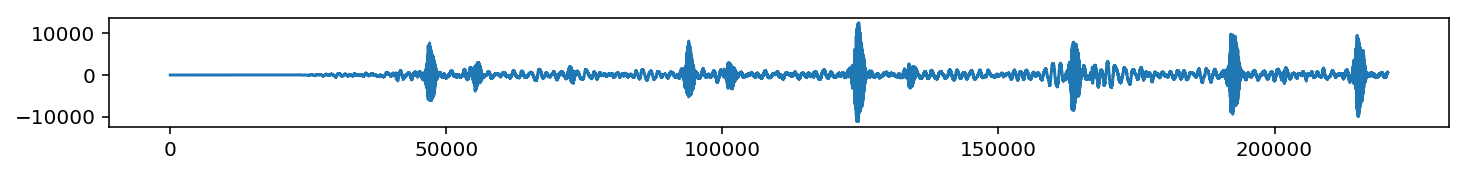

(

40

,

860

)

array([[18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305],
       [18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305, 18.305]])

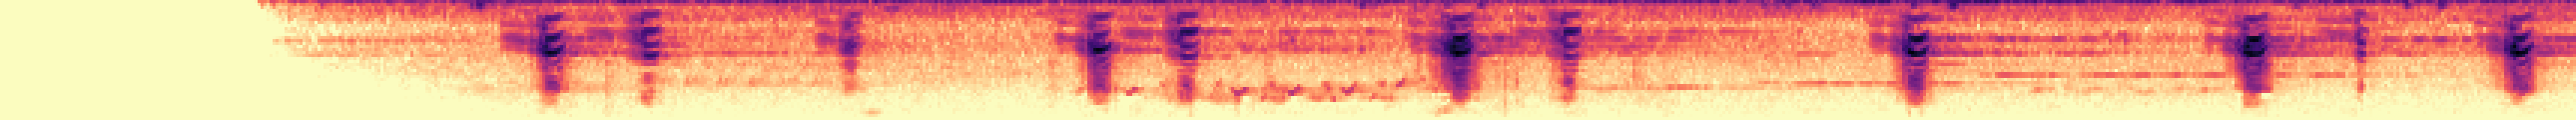

In [ ]:
with test_for_swift('Features.spectro: XC415272 start=0 end=10 (denoise=false)') as (name, Dump):
    denoise = False
    (xc_id, start_s, end_s) = (415272, 0, 10)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat(S, scale=3)  # (Upside down; use spectro.plot(raw=dict(scale=...)) for right side up)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, audio=audio.tolist(), S=S.tolist())

audio: [

] |   0% (1) |  0.0s

audio: [

###########################################################################################

] | 100% (1) |  0.1s

 685 scipy.signal.spectral/spectrogram: args , x_shape=(220500,), x=array([0, 0, 0, 0, 0], dtype=int16), fs=22050, window='hann', nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='magnitude'

1481 scipy.signal.spectral/_spectral_helper: args , x_shape=(220500,), x=array([0, 0, 0, 0, 0], dtype=int16), fs=22050, nperseg=512, noverlap=256, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='stft'

1710 scipy.signal.spectral/_fft_helper: args  , x_shape=(220500,), x=array([0, 0, 0, 0, 0], dtype=int16), nperseg=512, noverlap=256, nfft=512, sides='onesided'

1721 scipy.signal.spectral/_fft_helper: strid, result_shape=(860, 512), result=array([0, 0, 0, 0, 0], dtype=int16), step=256, strides=(512, 2), shape=(860, 512)

1725 scipy.signal.spectral/_fft_helper: detre, result_shape=(860, 512), result=array([-0.012, -0.012, -0.012, -0.012, -0.012])

1729 scipy.signal.spectral/_fft_helper: windo, result_shape=(860, 512), result=array([-0.000e+00+0.j, -4.412e-07+0.j, -1.765e-06+0.j, -3.970e-06+0.j, -7.058e-06+0.j]), win=array([0.000e+00+0.j, 3.765e-05+0.j, 1.506e-04+0.j, 3.388e-04+0.j, 6.023e-04+0.j], dtype=complex64)

1738 scipy.signal.spectral/_fft_helper: fft  , result_shape=(860, 257), result=array([-1.254+0.j   ,  1.17 +0.126j,  0.952+1.997j, -2.31 -0.984j,  0.892+1.05j ]), func=<function rfft at 0x1144810d0>

1657 scipy.signal.spectral/_spectral_helper: scale, result_shape=(860, 257), result=array([-0.005+0.j   ,  0.005+0.j   ,  0.004+0.008j, -0.009-0.004j,  0.003+0.004j])

 713 scipy.signal.spectral/spectrogram: mode , Sxx_shape=(257, 860), Sxx=array([0.005, 0.005, 0.009, 0.01 , 0.005], dtype=float32)

(

(

220500

,

)

,

array([0, 0, 0, 0, 0, 0, 0], dtype=int16)

)

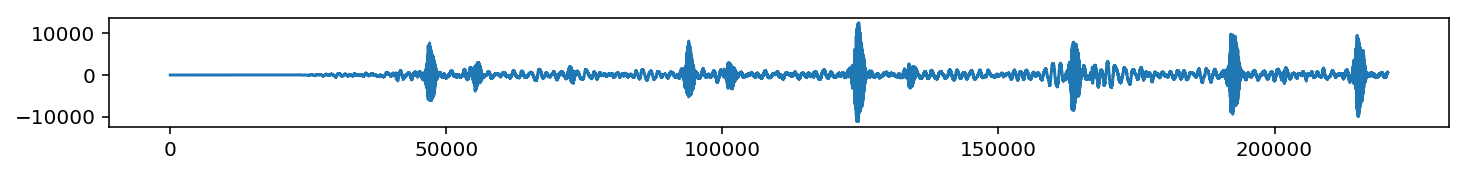

(

40

,

860

)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

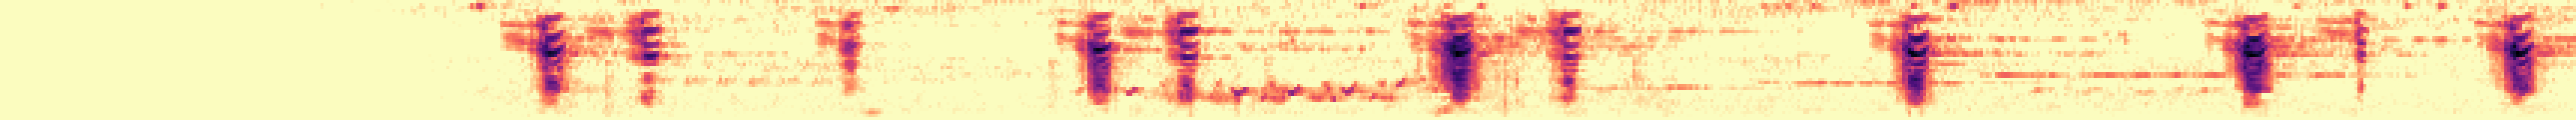

In [ ]:
with test_for_swift('Features.spectro: XC415272 start=0 end=10 (denoise=true)') as (name, Dump):
    denoise = True
    (xc_id, start_s, end_s) = (415272, 0, 10)
    search_rec = one(df_rows(sg.search_recs[lambda df: df.xc_id == xc_id]))
    rec = one(df_rows(sg.load.audio(sg.load.recs(paths=[('xc', Path(data_dir) / search_rec.path)]))))
    rec = sg.search.projection.features.slice_audio(rec, start_s, end_s)
    audio = rec.audio.unbox.to_numpy_array()
    spectro = sg.search.projection.features._spectro_nocache_from_audio(audio, denoise=denoise)
    S = spectro.S
    sig(audio)
    mat(S, scale=3)  # (Upside down; use spectro.plot(raw=dict(scale=...)) for right side up)
    raise Dump(sample_rate=sample_rate, f_bins=f_bins, denoise=denoise, audio=audio.tolist(), S=S.tolist())